In [102]:
# Importing Libraries and Data
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Reading in data file
df = pd.read_csv("vehicles_cleaned.csv")

In [103]:
#Getting a view of the data file
df.head()

,Unnamed: 0,price,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,lat,long
0,0,10299,2012.0,acura,gas,90186.0,clean,automatic,NaN,other,35.7636,-78.7443
1,2,9500,2011.0,jaguar,gas,85000.0,clean,automatic,NaN,NaN,36.1032,-79.8794
2,3,3995,2004.0,honda,gas,212526.0,clean,automatic,fwd,SUV,35.7636,-78.7443
3,5,12995,2015.0,kia,gas,85127.0,clean,automatic,4wd,wagon,35.7636,-78.7443
4,6,10995,2014.0,chevrolet,gas,112383.0,clean,automatic,fwd,SUV,35.7636,-78.7443


In [104]:
#Exploring data values
df.describe()

,Unnamed: 0,price,year,odometer,lat,long
count,378282.000000,378282.000000,378282.000000,378282.000000,375054.000000,375054.000000
mean,269314.529779,13485.515634,2010.451277,99863.857461,38.649627,-93.792458
std,156033.402681,8683.848464,7.034303,57685.741436,5.761292,17.632204
min,0.000000,1000.000000,1908.000000,0.000000,-84.911400,-170.288000
25%,133776.250000,6300.000000,2007.000000,52134.000000,34.601900,-106.618500
50%,268547.500000,11900.000000,2012.000000,97466.500000,39.320000,-87.705200
75%,404732.750000,18975.000000,2015.000000,140000.000000,42.496500,-81.016150
max,539758.000000,38629.000000,2020.000000,271418.000000,84.514800,161.016000


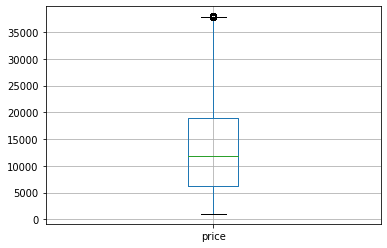

In [105]:
#Removing outliers from the Price column by calculating IQR
df = df[df['price'].between(999.99, 250000)]
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df_filtered = df.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('price')

In [106]:
#Exploring updated data values
df_filtered.describe()

,Unnamed: 0,price,year,odometer,lat,long
count,377146.000000,377146.000000,377146.000000,377146.000000,373925.000000,373925.000000
mean,269345.652127,13411.257070,2010.436369,100014.132636,38.643105,-93.761206
std,156040.928320,8590.690846,7.030481,57665.991611,5.753456,17.614494
min,0.000000,1000.000000,1908.000000,0.000000,-84.911400,-170.288000
25%,133833.250000,6288.000000,2007.000000,52359.000000,34.601900,-106.591000
50%,268542.500000,11900.000000,2012.000000,97667.000000,39.313600,-87.685700
75%,404800.500000,18900.000000,2015.000000,140000.000000,42.486100,-81.004500
max,539758.000000,37987.000000,2020.000000,271418.000000,84.514800,161.016000


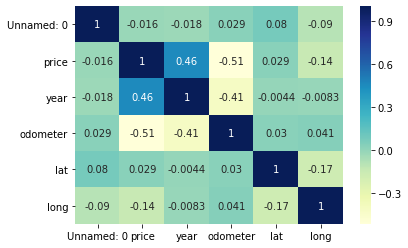

In [107]:
#Creating a heatmap using Seaborn
corr = df_filtered.corr()
heatmap = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, \
           annot=True, cmap="YlGnBu")

#Fixing the bug that cuts off the top and bottom of the chart
m, n = plt.ylim() # finding the values for bottom and top
m += 0.5 # Add 0.5 to the bottom
n -= 0.5 # Subtract 0.5 from the top
plt.ylim(m, n) 
plt.show() 

In [108]:
#Creating dummy variables
df_filtered = pd.get_dummies(df_filtered, drop_first=True)
print(df_filtered.columns)

Index(['Unnamed: 0', 'price', 'year', 'odometer', 'lat', 'long',
       'manufacturer_alfa-romeo', 'manufacturer_aston-martin',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacture

In [109]:
#Scaling our data

#Getting column indexes and values w/ iloc and loc for our explanatory variables, scaling
X_head = df_filtered.iloc[:, df_filtered.columns != 'price']
X = df_filtered.loc[:, df_filtered.columns != 'price']
X = StandardScaler().fit_transform(X)

#Storing price as our response variable
y = df_filtered['price']


In [133]:
#Filling NAN values
df_filtered.isnull().any()
df_filtered = df_filtered.fillna(value=0)

In [134]:
#Creating our Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

#Creating our training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

#Creating model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').